In [22]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
df=pd.read_csv('cardata.csv')
df.shape

(301, 9)

In [23]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.describe(include='O')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,299,299,299,299
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,193,260


In [26]:
df.drop(columns=['Car_Name'],inplace=True)

In [27]:
df['AGE']=2023-df['Year']

In [28]:
df.drop(columns=['Year'],inplace=True)

In [29]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,AGE
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [30]:
df=pd.get_dummies(data=df,drop_first=True)

In [31]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,AGE,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,True,False,False,True
297,4.00,5.90,60000,0,8,False,True,False,True
298,3.35,11.00,87934,0,14,False,True,False,True
299,11.50,12.50,9000,0,6,True,False,False,True


In [32]:
y=df['Selling_Price']
x=df.drop(columns=['Selling_Price'])

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
y_prid=lr.predict(x_test)

In [35]:
for i,j in zip(y_test,y_prid):
    print(i,'-->',j)

3.0 --> 2.938213177243852
4.75 --> 6.435482782306464
1.35 --> 2.29097330366039
0.4 --> 0.7784204267860506
5.75 --> 6.297230483521112
0.6 --> 1.3105659039879818
0.1 --> -3.5084062540316374
0.75 --> 1.0606286695610212
3.75 --> 4.336915468568551
8.25 --> 9.0846267646426
4.4 --> 4.457600078236157
1.25 --> 1.5208798517062165
0.2 --> -0.43175706181592766
10.25 --> 7.524950821692446
8.55 --> 9.063680017912459
6.0 --> 4.1944975236842
19.75 --> 14.53959037882194
3.0 --> 2.5951016245757517
0.78 --> 1.9941248879179412
8.65 --> 7.8117653531221665
16.0 --> 14.591472743290947
0.2 --> -2.1227306744227885
9.1 --> 6.821255962025486
1.0 --> 0.04843333175026299
1.65 --> 2.4288250081062985
1.1 --> 0.3719605242025539
0.25 --> 0.3381781307034064
3.5 --> 4.193494988370365
1.05 --> 0.3973425290840922
0.72 --> 1.8434258017156475
5.8 --> 5.212473899741411
0.25 --> 0.8063542139277136
4.15 --> 3.093862282836831
0.45 --> 1.6566624012043167
0.25 --> 0.9116535039656561
1.15 --> 1.213262613560639
3.9 --> 4.3515722186

In [36]:
print(mean_squared_error(y_prid,y_test))
print(mean_absolute_error(y_prid,y_test))
print(r2_score(y_prid,y_test))
x_test


4.021427492748014
1.2569155803209582
0.8346320286526534


,Present_Price,Kms_Driven,Owner,AGE,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
25,4.990,20000,0,12,False,True,False,True
65,6.950,45000,0,9,True,False,False,True
104,1.470,4100,0,6,False,True,True,True
172,0.640,13700,0,9,False,True,True,True
287,7.500,44000,0,8,False,True,False,False
...,...,...,...,...,...,...,...,...
50,30.610,104707,0,11,True,False,False,False
275,13.600,30753,0,7,False,True,False,False
196,0.520,500000,0,15,False,True,True,False
59,35.960,41000,0,9,True,False,False,False


In [37]:
lr.predict([[6.0,120000,0,6,0,1,1,0]])

c:\Users\divye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3.6586374216303477

<Axes: xlabel='Selling_Price'>

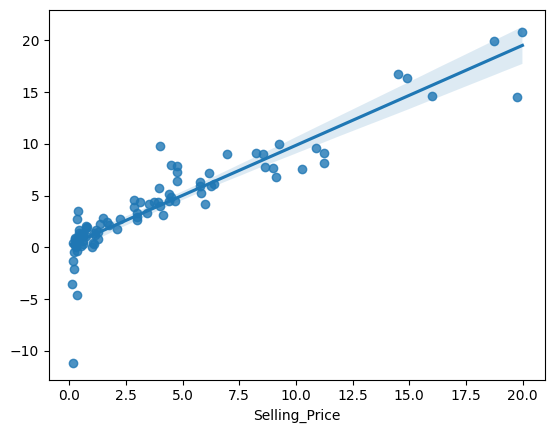

In [38]:
sns.regplot(y=y_prid,x=y_test)

In [39]:
import pandas as pd 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def mlModel():
    df=pd.read_csv('https://raw.githubusercontent.com/divyesh3489/ML_Model/main/cardata.csv')
    df.drop_duplicates(inplace=True)
    df.drop(columns=['Car_Name'],inplace=True)
    df['AGE']=2023-df['Year']
    df.drop(columns=['Year'],inplace=True)
    df=pd.get_dummies(data=df,drop_first=True)
    y=df['Selling_Price']
    x=df.drop(columns=['Selling_Price'])
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    with open("CarModel.pkl", "wb") as file: 
        pickle.dump(lr, file) 
mlModel()